# INTRODUCTION

# IMPORT & SETUP

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
import seaborn as sns


import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, mean_absolute_error, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier


# THE DATASET

##### Features: 
###### We see here an example entry from the dataset, we count 45 features, two of which are target features

In [75]:
file_path = 'data/train.csv' 
data = pd.read_csv(file_path)

i = 0
for column in data.columns:
    print(i, "\t ", column, "\t \t \t", data[column][50], "\n")
    i = i+1


0 	  Patient Id 	 	 	 PID0x97c3 

1 	  Patient Age 	 	 	 9.0 

2 	  Genes in mother's side 	 	 	 No 

3 	  Inherited from father 	 	 	 Yes 

4 	  Maternal gene 	 	 	 No 

5 	  Paternal gene 	 	 	 Yes 

6 	  Blood cell count (mcL) 	 	 	 5.0282352663130565 

7 	  Patient First Name 	 	 	 Elton 

8 	  Family Name 	 	 	 Browning 

9 	  Father's name 	 	 	 Abdihamid 

10 	  Mother's age 	 	 	 30.0 

11 	  Father's age 	 	 	 50.0 

12 	  Institute Name 	 	 	 New England Baptist Hospital 

13 	  Location of Institute 	 	 	 125 NASHUA ST
CENTRAL, MA 02114
(42.36764789068138, -71.06564730220646) 

14 	  Status 	 	 	 Alive 

15 	  Respiratory Rate (breaths/min) 	 	 	 Normal (30-60) 

16 	  Heart Rate (rates/min 	 	 	 Normal 

17 	  Test 1 	 	 	 0.0 

18 	  Test 2 	 	 	 0.0 

19 	  Test 3 	 	 	 0.0 

20 	  Test 4 	 	 	 1.0 

21 	  Test 5 	 	 	 0.0 

22 	  Parental consent 	 	 	 Yes 

23 	  Follow-up 	 	 	 High 

24 	  Gender 	 	 	 Female 

25 	  Birth asphyxia 	 	 	 No record 

26 	  Autopsy show

##### Target features

In [76]:
disease_col = 'Genetic Disorder'  
subclass_col = 'Disorder Subclass'  


grouped_data = data.groupby([disease_col, subclass_col]).size().reset_index(name='Count')
num_combinations = grouped_data.shape[0]
print(f"Number of unique disease-subclass combinations: {num_combinations}")

print("Number of entries in the dataset:", len(data))

print("\nUnique Combinations of Disease and Subclass:")
grouped_data.head(10)




Number of unique disease-subclass combinations: 9
Number of entries in the dataset: 22083

Unique Combinations of Disease and Subclass:


,Genetic Disorder,Disorder Subclass,Count
0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,587
1,Mitochondrial genetic inheritance disorders,Leigh syndrome,4683
2,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy,3971
3,Multifactorial genetic inheritance disorders,Alzheimer's,133
4,Multifactorial genetic inheritance disorders,Cancer,91
5,Multifactorial genetic inheritance disorders,Diabetes,1653
6,Single-gene inheritance diseases,Cystic fibrosis,3145
7,Single-gene inheritance diseases,Hemochromatosis,1228
8,Single-gene inheritance diseases,Tay-Sachs,2556


###### There are 3 genetic disorders, each with 3 subclasses. 
###### We notice that there are null entries in the target features, these will not be able to controbute to the model

c:\Users\lk-sa\anaconda3\envs\sklearn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lk-sa\anaconda3\envs\sklearn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lk-sa\anaconda3\envs\sklearn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


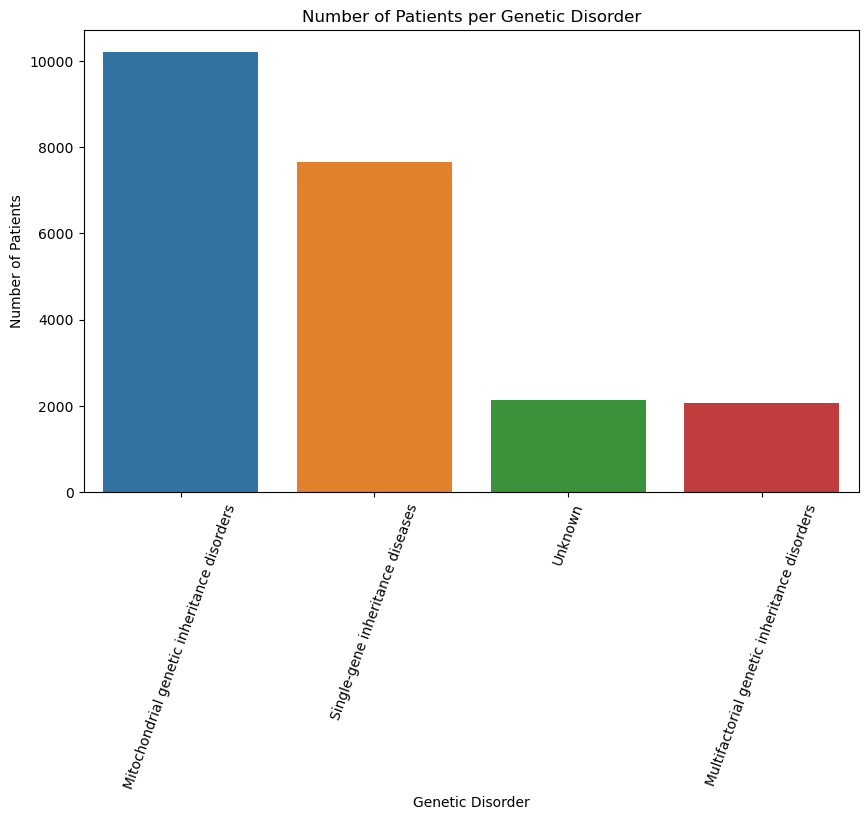

c:\Users\lk-sa\anaconda3\envs\sklearn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lk-sa\anaconda3\envs\sklearn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lk-sa\anaconda3\envs\sklearn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


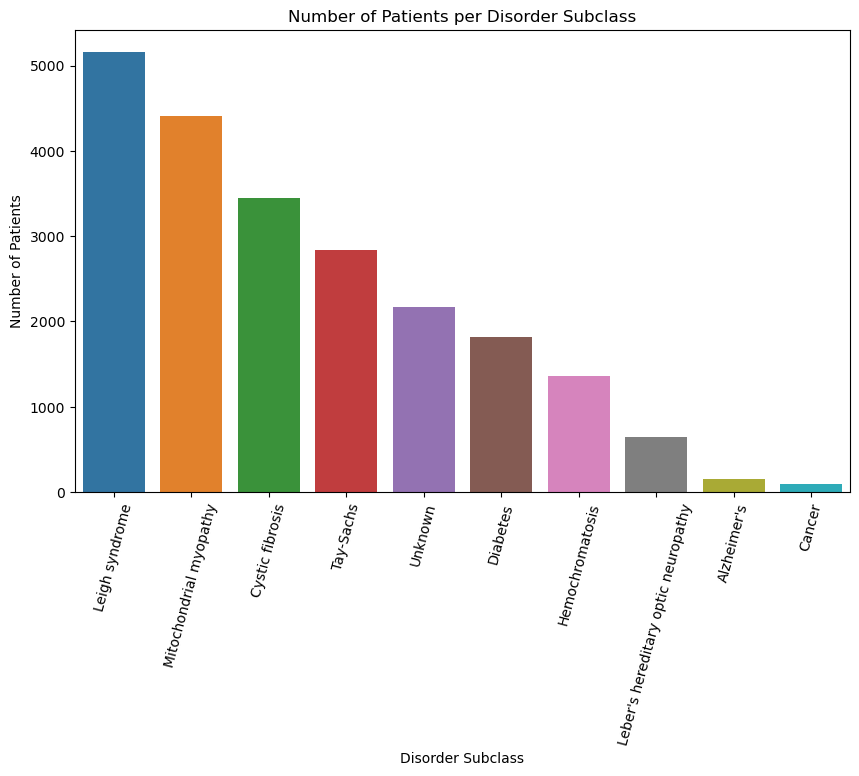

In [78]:
data[disease_col].fillna('Unknown', inplace=True)
data[subclass_col].fillna('Unknown', inplace=True)


# Counting patients for each disease and subclass
disease_count = data[disease_col].value_counts()
subclass_count = data[subclass_col].value_counts()

# Plotting Bar Chart for Diseases
plt.figure(figsize=(10, 6))
sns.barplot(x=disease_count.index, y=disease_count.values)
plt.title('Number of Patients per Genetic Disorder')
plt.ylabel('Number of Patients')
plt.xlabel('Genetic Disorder')
plt.xticks(fontsize=10, rotation=70) 
plt.show()

# Plotting Bar Chart for Subclasses
plt.figure(figsize=(10, 6))
sns.barplot(x=subclass_count.index, y=subclass_count.values)
plt.title('Number of Patients per Disorder Subclass')
plt.ylabel('Number of Patients')
plt.xlabel('Disorder Subclass')
plt.xticks(fontsize=10, rotation=75) 
plt.show()

# PRE-PROCESSING

##### We first start by removing all the entries where both taget features are unknown.

In [80]:



print("Number of entries in the dataset before cleaning:", len(data))

null_both_count = data[(data[disease_col] == 'Unknown') & (data[subclass_col] == 'Unknown')].shape[0]
print(f"Number of entries with null values in both 'Genetic Disorder' and 'Disorder Subclass': {null_both_count}")


data_1 = data[~((data[disease_col] == 'Unknown') & (data[subclass_col] == 'Unknown'))]
print("Number of entries after cleaning dataset =", data_1.shape[0])

null_both_count = data_1[(data_1[disease_col] == 'Unknown') & (data_1[subclass_col] == 'Unknown')].shape[0]
print(f"Number of entries with null values in both 'Genetic Disorder' and 'Disorder Subclass': {null_both_count}")



data_1


Number of entries in the dataset before cleaning: 22083
Number of entries with null values in both 'Genetic Disorder' and 'Disorder Subclass': 278
Number of entries after cleaning dataset = 21805
Number of entries with null values in both 'Genetic Disorder' and 'Disorder Subclass': 0


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,Unknown,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,Unknown,Leigh syndrome


##### We remove all features that don't contribute directly to the training model

In [81]:
# List of columns to be dropped
columns_to_drop = ['Institute Name', 'Location of Institute', "Father's name", 
                   'Patient First Name', 'Family Name', 'Patient Id']

# Dropping the specified columns
data_1 = data_1.drop(columns=columns_to_drop)

data_1

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,Deceased,Tachypnea,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,Unknown,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,4.0,Yes,Yes,Yes,No,5.258298,35.0,64.0,Deceased,Normal (30-60),...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,8.0,No,Yes,No,Yes,4.974220,NaN,56.0,Alive,Normal (30-60),...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,8.0,Yes,No,Yes,No,5.186470,35.0,51.0,Deceased,Tachypnea,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,7.0,Yes,No,Yes,Yes,4.858543,19.0,NaN,Alive,Tachypnea,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,Unknown,Leigh syndrome


In [82]:
total = 0
for column in data_1.columns:
    unique_values = data_1[column].unique()
    nan_counts = data_1[column].isnull().sum()
    total = total + nan_counts
    print(f"{column}: {unique_values}: {nan_counts}")
    
print(total)

Patient Age: [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]: 1408
Genes in mother's side: ['Yes' 'No']: 0
Inherited from father: ['No' 'Yes' nan]: 304
Maternal gene: ['Yes' 'No' nan]: 2758
Paternal gene: ['No' 'Yes']: 0
Blood cell count (mcL): [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]: 0
Mother's age: [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 29. 31. 27. 43. 39.]: 5943
Father's age: [nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 37. 36. 33. 46. 40. 45.]: 5866
Status: ['Alive' 'Deceased']: 0
Respiratory Rate (breaths/min): ['Normal (30-60)' 'Tachypnea' nan]: 2113
Heart Rate (rates/min: ['Normal' 'Tachycardia' nan]: 2065
Test 1: [ 0. nan]: 2090
Test 2: [nan  0.]: 2112
Test 3: [nan  0.]: 2117
Test 4: [ 1. nan]: 2102
Test 5: [ 0. nan]: 2132
Parental

5638
